In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tomatoleaf/tomato/cnn_train.py
/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight/0db85707-41f9-42df-ba3b-842d14f00a68___GHLB2 Leaf 8909.JPG
/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight/0fca6d09-1931-4767-a195-1dd2b7cd10b7___GHLB Leaf 8 Day 12.JPG
/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight/Tomato___Late_blight_original_0ba7d3d8-5c4c-4365-ba0c-69f61e96a36e___RS_Late.B 5312.JPG_0c8b3e88-9afa-41e1-a767-122ad7b27ac2.JPG
/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight/1b212ad6-e65a-4467-bfd1-9f9139070d33___GHLB2 Leaf 8609.JPG
/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight/1d6d043a-9df9-49ec-9b0f-e40a8e7f409f___RS_Late.B 5287.JPG
/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight/1d83eef4-92a0-42a2-9ea7-1ec2e683dbc0___GHLB2 Leaf 8809.JPG
/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight/01ebf21e-ef94-4c92-b007-0b26741c2fc8___GHLB2 Leaf 9075.JPG
/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight/1f38a263-cfb5-

In [2]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model
from keras.applications.inception_v3 import InceptionV3
from glob import glob
from keras.layers import Flatten,Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator,img_to_array,array_to_img,load_img

In [3]:
IMAGE_SIZE = [224,224]

In [4]:
# Create InceptionV3 Layer
inception = InceptionV3(include_top=False,weights='imagenet',input_shape=IMAGE_SIZE + [3])

2022-11-29 17:01:30.247104: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-29 17:01:30.248131: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-29 17:01:30.408752: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-29 17:01:30.409695: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-29 17:01:30.410510: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

87924736/87910968 [==============================] - 0s 0us/step


In [5]:
for layer in inception.layers:
  layer.trainable = False

In [6]:
# we will use the glob to see how many outputs / labels there are
folders = glob('../input/tomatoleaf/tomato/train/*')

In [7]:
folders

['../input/tomatoleaf/tomato/train/Tomato___Late_blight',
 '../input/tomatoleaf/tomato/train/Tomato___healthy',
 '../input/tomatoleaf/tomato/train/Tomato___Early_blight',
 '../input/tomatoleaf/tomato/train/Tomato___Septoria_leaf_spot',
 '../input/tomatoleaf/tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '../input/tomatoleaf/tomato/train/Tomato___Bacterial_spot',
 '../input/tomatoleaf/tomato/train/Tomato___Target_Spot',
 '../input/tomatoleaf/tomato/train/Tomato___Tomato_mosaic_virus',
 '../input/tomatoleaf/tomato/train/Tomato___Leaf_Mold',
 '../input/tomatoleaf/tomato/train/Tomato___Spider_mites Two-spotted_spider_mite']

In [8]:
# Add Flatten and Dense in last layers
x = Flatten()(inception.output)
prediction = Dense(len(folders),activation='softmax')(x)


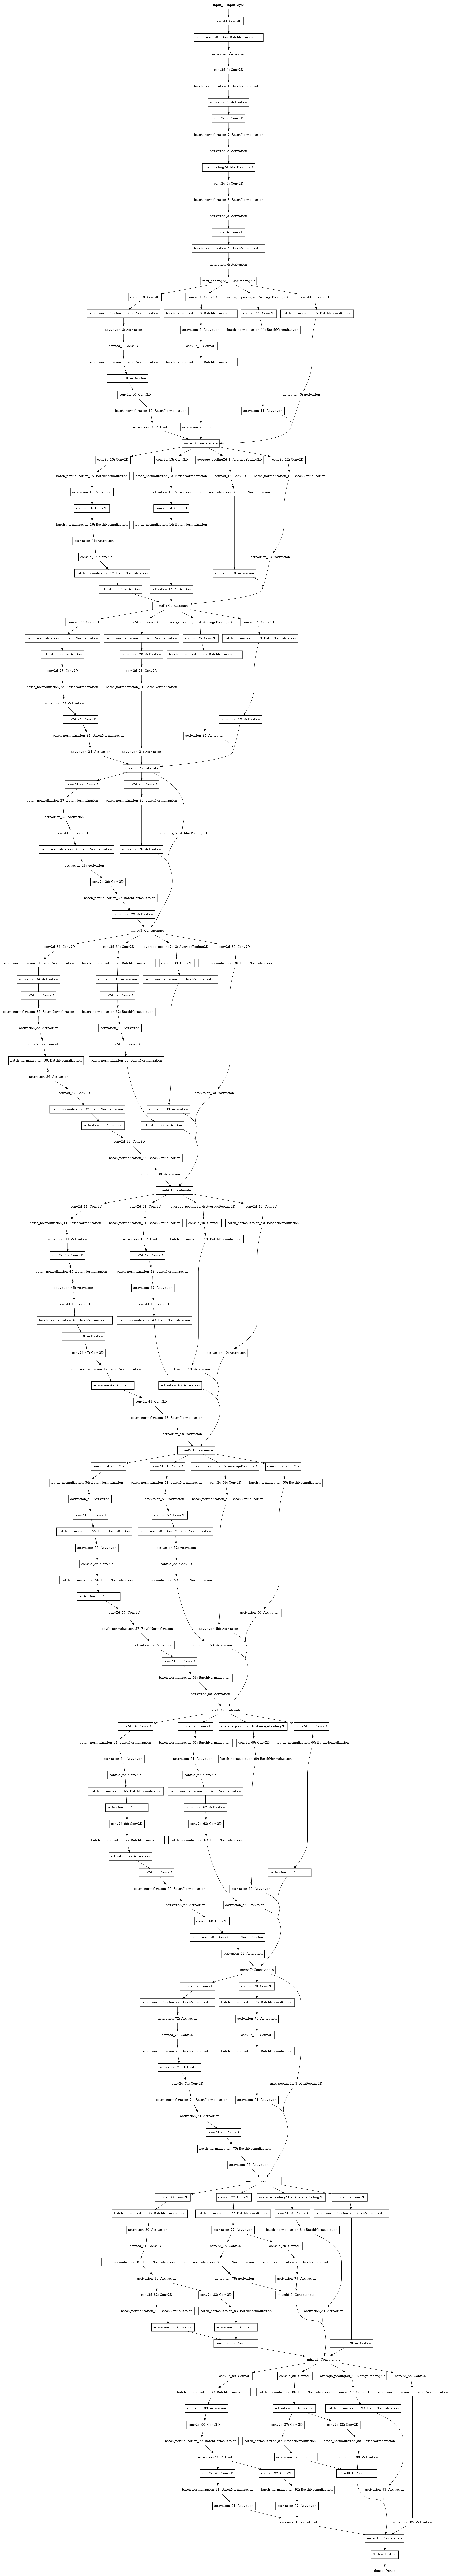

In [9]:
model = Model(inputs=inception.input,outputs = prediction)
plot_model(model)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [11]:
# Compile the model that we have created with adam and the loss is categorical_crossentropy because the classification is more than 2 classes
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
# Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2)
test_datagen = ImageDataGenerator(
    rescale=1./255)

In [13]:
# Apply Image Augmentation to Train and Test Images
training_set = train_datagen.flow_from_directory('../input/tomatoleaf/tomato/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('../input/tomatoleaf/tomato/val',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [14]:
import tensorflow as tf
# CallBack EarlyStop
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)


In [15]:
# Train data
history = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=30,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set),
    callbacks=[early]
)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-11-29 17:01:45.136702: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-11-29 17:01:50.397065: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


313/313 [==============================] - 178s 530ms/step - loss: 3.6970 - accuracy: 0.6356 - val_loss: 2.5757 - val_accuracy: 0.6810
Epoch 2/30
313/313 [==============================] - 138s 442ms/step - loss: 2.0820 - accuracy: 0.7621 - val_loss: 3.0538 - val_accuracy: 0.7170
Epoch 3/30
313/313 [==============================] - 141s 450ms/step - loss: 1.9618 - accuracy: 0.8038 - val_loss: 3.6336 - val_accuracy: 0.7250
Epoch 4/30
313/313 [==============================] - 138s 441ms/step - loss: 1.7092 - accuracy: 0.8256 - val_loss: 3.3815 - val_accuracy: 0.7530
Epoch 5/30
313/313 [==============================] - 136s 434ms/step - loss: 1.6855 - accuracy: 0.8407 - val_loss: 2.8652 - val_accuracy: 0.7840
Epoch 6/30
313/313 [==============================] - 141s 449ms/step - loss: 1.4500 - accuracy: 0.8634 - val_loss: 3.6380 - val_accuracy: 0.7540


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

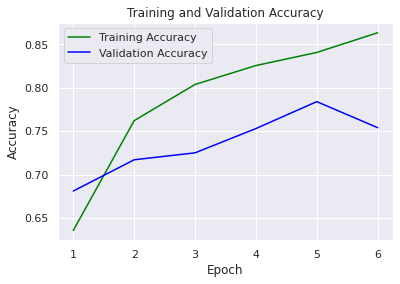

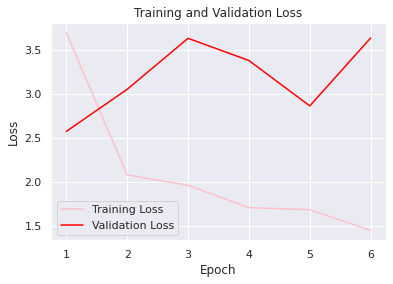

In [17]:
# Visualize the Accuracy and Loss to check whether our model is overfitting or not
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
# Loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

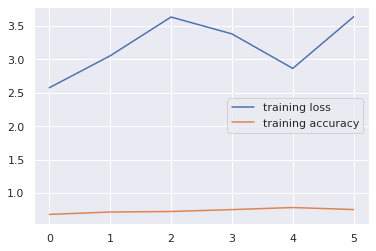

In [18]:
# Visualize train data val accuracy and val loss
plt.plot(history.history['val_loss'], label = 'training loss')
plt.plot(history.history['val_accuracy'], label = 'training accuracy')
plt.legend()

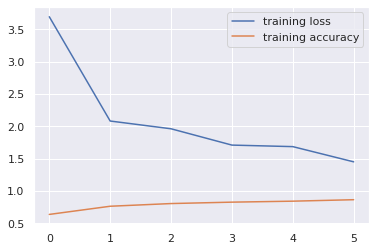

In [19]:
# Visualize test data accuracy and loss
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.legend()

### Save Weight model
model.save_weights("modelInceptionV3.h5")